# Initial Notes about Musical Visuals

Code from: https://www.33rdsquare.com/visualizing-sounds-librosa/

To put audio over: https://docs.manim.community/en/stable/guides/add_voiceovers.html. This is only for AI generated speech but we can see..

In [6]:
import librosa
import numpy as np
import pandas as pd

In [7]:
audio_file = "Shape of You_preview.wav"
y, sr = librosa.load(audio_file)

In [8]:
y

array([ 2.7939677e-08,  1.1175871e-08,  2.0489097e-08, ...,
       -1.4917713e-01, -1.4172842e-01, -1.6016728e-01], dtype=float32)

In [9]:
y.shape

(661248,)

In [10]:
sr

22050

In [11]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
tempo

array([129.19921875])

Let's check: https://tunebat.com/Info/Here-Comes-The-Sun-Remastered-2009-The-Beatles/6dGnYIeXmHdcikdzNNDMm2

This gives the time stamps for every time there is a "beat event"

In [12]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([ 0.06965986,  0.53405896,  1.04489796,  1.55573696,  2.06657596,
        2.53097506,  2.99537415,  3.4829932 ,  3.97061224,  4.43501134,
        4.89941043,  5.36380952,  5.80498866,  6.29260771,  6.7570068 ,
        7.24462585,  7.70902494,  8.17342404,  8.63782313,  9.10222222,
        9.56662132, 10.03102041, 10.4954195 , 10.95981859, 11.44743764,
       11.93505669, 12.39945578, 12.86385488, 13.30503401, 13.76943311,
       14.18739229, 14.58213152, 15.04653061, 15.48770975, 15.90566893,
       16.32362812, 16.76480726, 17.22920635, 17.69360544, 18.18122449,
       18.64562358, 19.11002268, 19.57442177, 20.03882086, 20.50321995,
       20.990839  , 21.4552381 , 21.94285714, 22.40725624, 22.87165533,
       23.33605442, 23.80045351, 24.26485261, 24.75247166, 25.21687075,
       25.68126984, 26.14566893, 26.61006803, 27.07446712, 27.53886621,
       28.00326531, 28.49088435, 28.95528345, 29.41968254])

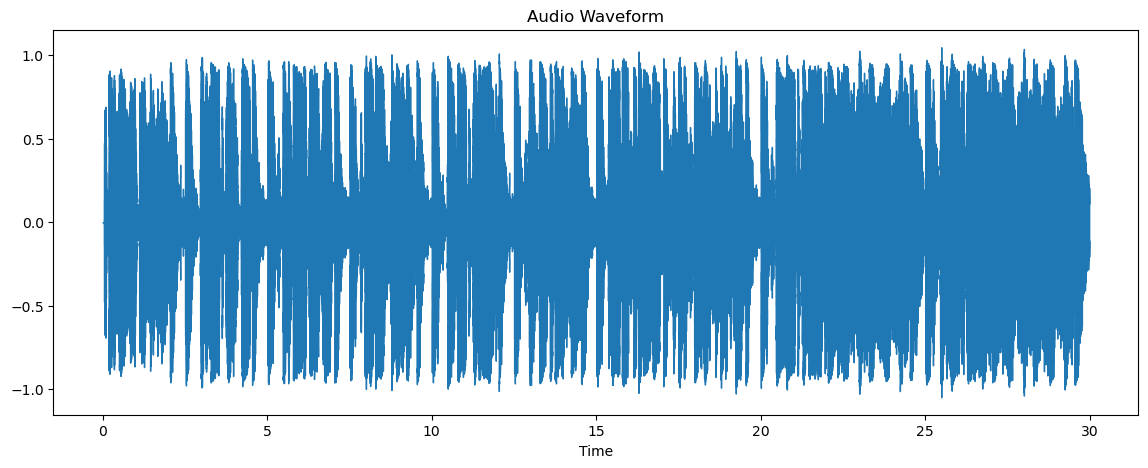

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.show()

In [14]:
y_harm, y_perc = librosa.effects.hpss(y)

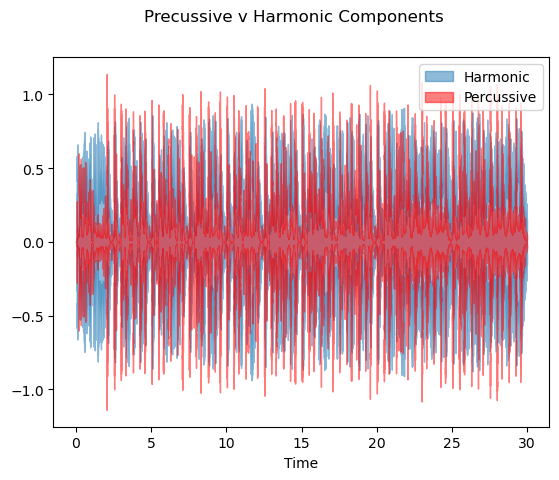

In [15]:
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, label='Percussive')
plt.legend()
plt.suptitle("Precussive v Harmonic Components");

In [16]:
from IPython.display import Audio

In [18]:
Audio(data=y_perc, rate=sr)

In [19]:
Audio(data=y_harm, rate=sr)

In [20]:
Audio(data=y_perc+y_harm,rate=sr)

## Graphs

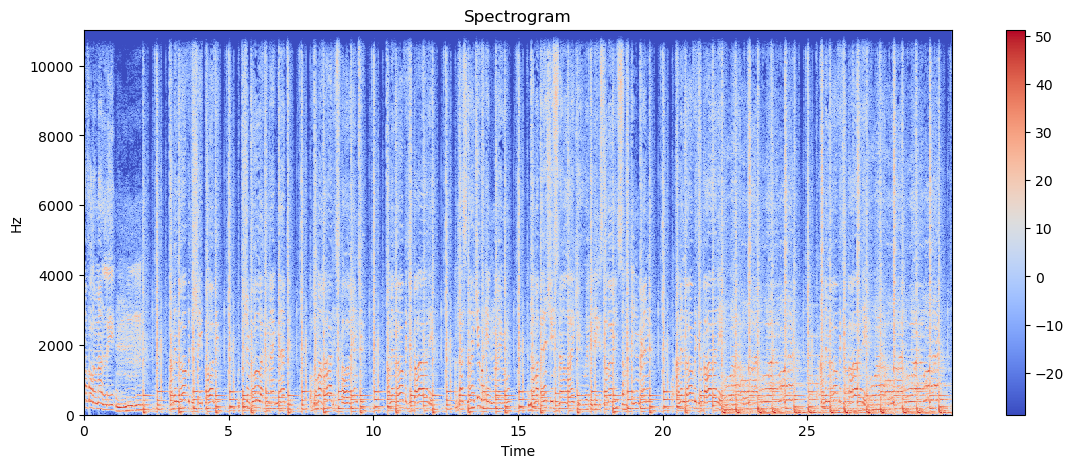

In [21]:
spectrogram = librosa.stft(y) 
S_db = librosa.amplitude_to_db(abs(spectrogram))

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.show()

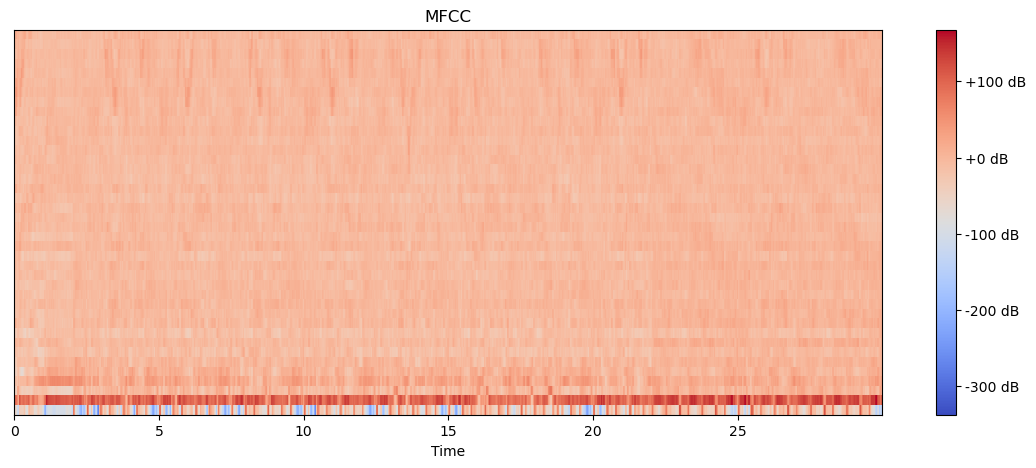

In [22]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

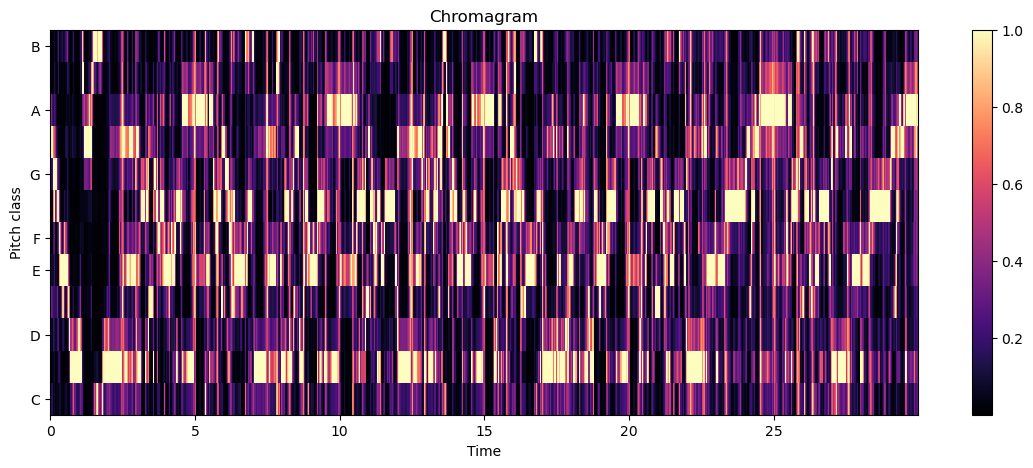

In [23]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr) 

plt.figure(figsize=(14, 5)) 
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

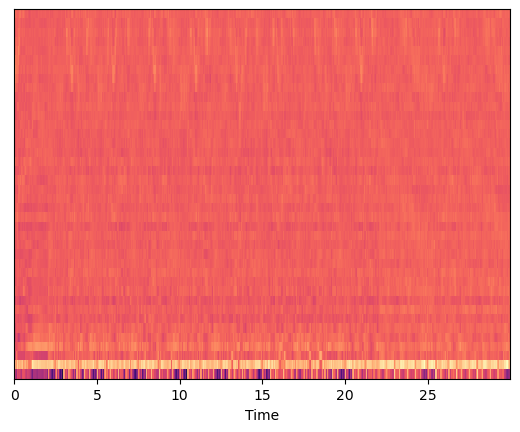

In [24]:
librosa.display.specshow(mfccs, x_axis='time', cmap='magma')